In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

% matplotlib inline

# 直接读取数据(这里不用教程里面的从网上自动下载数据的方式)
sentiment = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Date-Time\data\sentiment.csv",
    index_col=0, parse_dates=[0]
)
print(len(sentiment))
sentiment[:5]


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


199


,UMCSENT
DATE,
2000-01-01,112.0
2000-02-01,111.3
2000-03-01,107.1
2000-04-01,109.2
2000-05-01,110.7


In [6]:
sentiment_short = sentiment.loc["2005":"2016"]
print(len(sentiment_short))


139


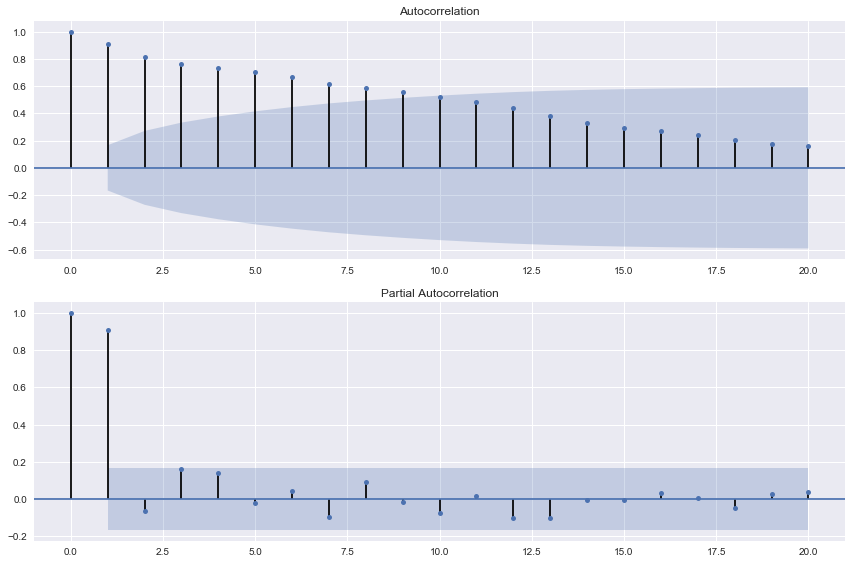

In [9]:
sns.set()
fig = plt.figure(figsize=(12, 8))

# acf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sentiment_short, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position("bottom")
fig.tight_layout()

# pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sentiment_short, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()


In [11]:
# 更直观的表示
def tsplot(y, lags=None, title="", figsize=(14, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax


(<matplotlib.axes._subplots.AxesSubplot at 0x24443c59f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24443a83390>)

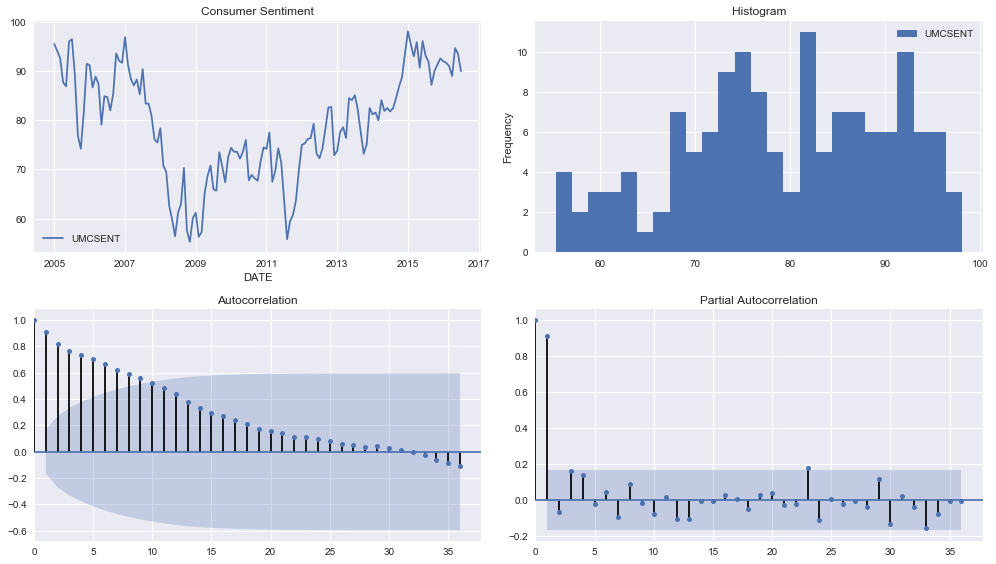

In [13]:
tsplot(sentiment_short, title='Consumer Sentiment', lags=36)


In [24]:
# 读取数据，series1
ts_df = pd.read_csv(
    "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Date-Time\data\series1.csv",
    index_col=0, parse_dates=[0]
)
print(len(ts_df))
ts_df[:5]


120


,value
2006-06-01,0.215066
2006-07-01,1.142246
2006-08-01,0.080771
2006-09-01,-0.739519
2006-10-01,0.535516


In [25]:
# 训练集和测试集
n_sample = ts_df.shape[0]
n_train = int(0.95 * n_sample) + 1
n_forecast = n_sample - n_train
ts_train = ts_df.iloc[:n_train]['value']
ts_test = ts_df.iloc[n_train:]['value']
print(ts_train.shape)
print(ts_test.shape)


(115,)
(5,)


(<matplotlib.axes._subplots.AxesSubplot at 0x24444281ac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x244447e97b8>)

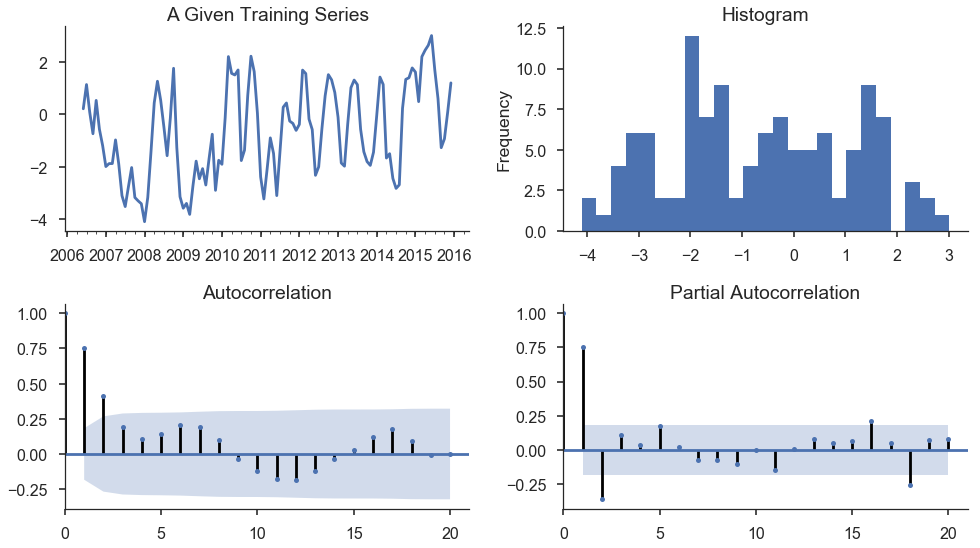

In [26]:
sns.set(style='ticks', context='poster')
tsplot(ts_train, title='A Given Training Series', lags=20)


In [28]:
arima200 = sm.tsa.SARIMAX(ts_train, order=(2, 0, 0))
model_results = arima200.fit()


In [29]:
import itertools

p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4

# Initialize a DataFrame to store the results
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min, p_max + 1)],
                           columns=['MA{}'.format(i) for i in range(q_min, q_max + 1)])

for p, d, q in itertools.product(range(p_min, p_max + 1),
                                 range(d_min, d_max + 1),
                                 range(q_min, q_max + 1)):
    if p == 0 and d == 0 and q == 0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue

    try:
        model = sm.tsa.SARIMAX(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                               )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\statespace\tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tools\numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'BIC')

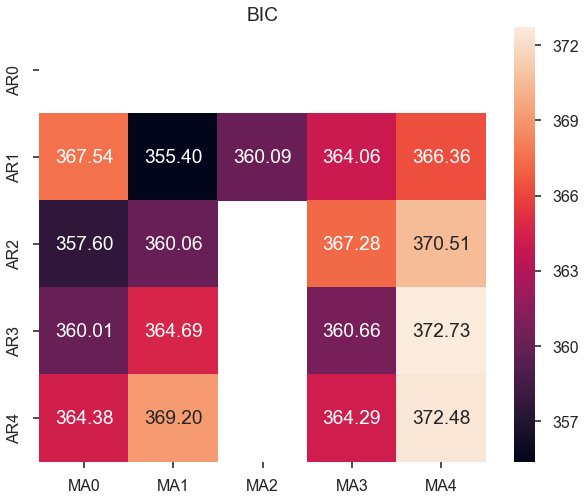

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')


In [31]:
train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AIC (4, 2)
BIC (1, 1)


D:\Coding\Anaconda3\envs\idata\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


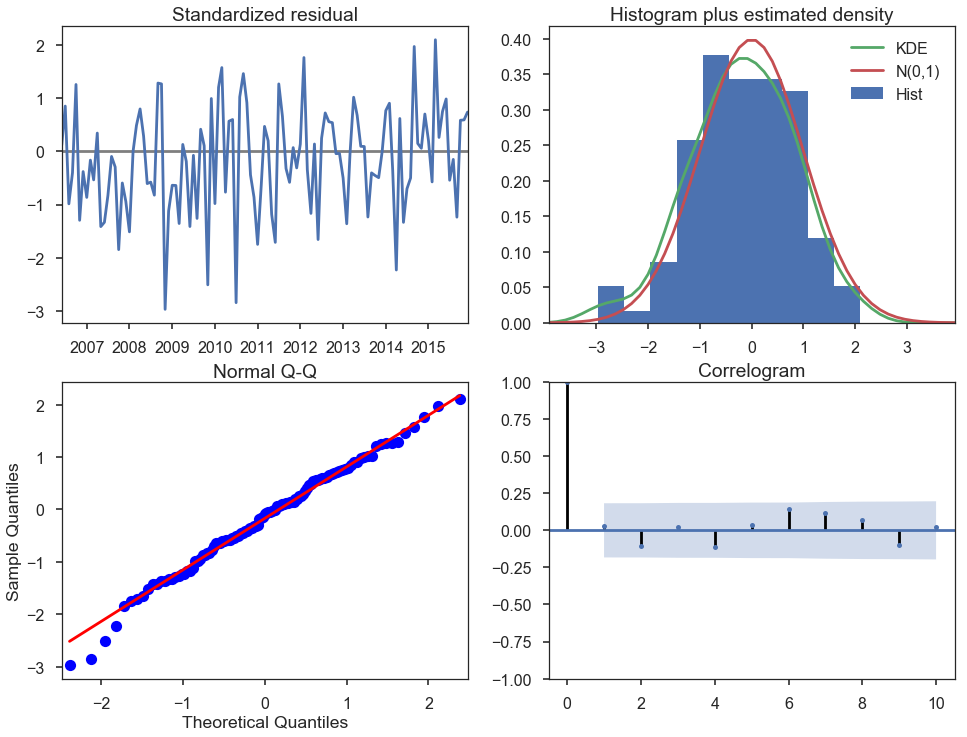

In [32]:
# 残差分析 正态分布 QQ图线性
model_results.plot_diagnostics(figsize=(16, 12))
